In [26]:
# 모듈 추가 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df = pd.read_csv('교육부_학생건강검사.csv')
print(df.shape)   # 형태 확인 (행, 열)
print(df.head())

(9686, 25)
    고유식별번호(ID)       최종가중치 학교고유번호(ID)      도시규모 도시규모별분석용   학년도 광역시도       시도별  \
0  Aa011남10101  169.550665       Aa01  대도시/중소도시   특별/광역시  2015   서울  서울특별시교육청   
1  Aa011남10102  169.550665       Aa01  대도시/중소도시   특별/광역시  2015   서울  서울특별시교육청   
2  Aa011남10103  169.550665       Aa01  대도시/중소도시   특별/광역시  2015   서울  서울특별시교육청   
3  Aa011남10104  169.550665       Aa01  대도시/중소도시   특별/광역시  2015   서울  서울특별시교육청   
4  Aa011남10105  169.550665       Aa01  대도시/중소도시   특별/광역시  2015   서울  서울특별시교육청   

   학교급별       학교명  ...      키   몸무게  혈당식전(mgdl) 총콜레스테롤(mgdl) 간기능(AST)단위(UL)  \
0     1  서울대도초등학교  ...  125.8  27.3         NaN          NaN            NaN   
1     1  서울대도초등학교  ...  124.3  25.4         NaN          NaN            NaN   
2     1  서울대도초등학교  ...  119.2  23.5         NaN          NaN            NaN   
3     1  서울대도초등학교  ...  115.0  20.0         NaN          NaN            NaN   
4     1  서울대도초등학교  ...  120.0  33.5         NaN          NaN            NaN   

   간기능(ALT)단위(UL)  혈색소(gdl)

* 일단 불필요한 데이터 제거 전에 데이터 정보 확인

In [3]:
df.info()   # 데이터 정보 확인 - 결측치 확인 및 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   고유식별번호(ID)      9686 non-null   object 
 1   최종가중치           9686 non-null   float64
 2   학교고유번호(ID)      9686 non-null   object 
 3   도시규모            9686 non-null   object 
 4   도시규모별분석용        9686 non-null   object 
 5   학년도             9686 non-null   int64  
 6   광역시도            9686 non-null   object 
 7   시도별             9686 non-null   object 
 8   학교급별            9686 non-null   int64  
 9   학교명             9686 non-null   object 
 10  공학여부            9686 non-null   object 
 11  학년              9686 non-null   int64  
 12  반               9686 non-null   int64  
 13  성별              9686 non-null   object 
 14  건강검진일           9686 non-null   object 
 15  키               9686 non-null   float64
 16  몸무게             9682 non-null   float64
 17  혈당식전(mgdl)      338 non-null    f

- 17  혈당식전(mgdl)      338 non-null    float64
- 18  총콜레스테롤(mgdl)    339 non-null    float64
- 19  간기능(AST)단위(UL)  336 non-null    float64

In [4]:
# 실제 사용할 데이터만 추출 
data = df.loc[:, ['학교고유번호(ID)','광역시도',	'학교명',	'학년',	'성별',	'키',	'몸무게', '혈당식전(mgdl)', '총콜레스테롤(mgdl)', '간기능(AST)단위(UL)']]
data.head()

,학교고유번호(ID),광역시도,학교명,학년,성별,키,몸무게,혈당식전(mgdl),총콜레스테롤(mgdl),간기능(AST)단위(UL)
0,Aa01,서울,서울대도초등학교,1,남,125.8,27.3,NaN,NaN,NaN
1,Aa01,서울,서울대도초등학교,1,남,124.3,25.4,NaN,NaN,NaN
2,Aa01,서울,서울대도초등학교,1,남,119.2,23.5,NaN,NaN,NaN
3,Aa01,서울,서울대도초등학교,1,남,115.0,20.0,NaN,NaN,NaN
4,Aa01,서울,서울대도초등학교,1,남,120.0,33.5,NaN,NaN,NaN


In [5]:
# 컬럼 이름 변경 
data.rename(columns={'학교고유번호(ID)':'학교고유번호', '혈당식전(mgdl)':'혈당식전', '총콜레스테롤(mgdl)':'총콜레스테롤', '간기능(AST)단위(UL)':'간기능'}, inplace=True)
data.head()

,학교고유번호,광역시도,학교명,학년,성별,키,몸무게,혈당식전,총콜레스테롤,간기능
0,Aa01,서울,서울대도초등학교,1,남,125.8,27.3,NaN,NaN,NaN
1,Aa01,서울,서울대도초등학교,1,남,124.3,25.4,NaN,NaN,NaN
2,Aa01,서울,서울대도초등학교,1,남,119.2,23.5,NaN,NaN,NaN
3,Aa01,서울,서울대도초등학교,1,남,115.0,20.0,NaN,NaN,NaN
4,Aa01,서울,서울대도초등학교,1,남,120.0,33.5,NaN,NaN,NaN


혈당식전 데이터가 있는 경우만 추출 - 338 개의 데이터에 대한 분석 

In [6]:
# 형당식전이 null인 데이터 제거
data2 = data[data['혈당식전'].notnull()]
print(data2.shape)
print(data2.head())


(338, 10)
    학교고유번호 광역시도       학교명  학년 성별      키   몸무게   혈당식전  총콜레스테롤   간기능
113   Aa01   서울  서울대도초등학교   4  남  145.3  52.2  102.0   177.0  21.0
116   Aa01   서울  서울대도초등학교   4  남  141.0  45.0   94.0   188.0  24.0
117   Aa01   서울  서울대도초등학교   4  남  133.5  37.5   94.0   144.0  30.0
121   Aa01   서울  서울대도초등학교   4  남  140.0  55.0  101.0   185.0  28.0
122   Aa01   서울  서울대도초등학교   4  남  136.2  48.0   93.0   171.0  22.0


In [7]:
#BMI 항목 추가
data2['BMI'] = data2['몸무게'] / (data2['키'] / 100) ** 2
data2.head()

C:\Users\UserK\AppData\Local\Temp\ipykernel_10656\1337148542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['BMI'] = data2['몸무게'] / (data2['키'] / 100) ** 2


,학교고유번호,광역시도,학교명,학년,성별,키,몸무게,혈당식전,총콜레스테롤,간기능,BMI
113,Aa01,서울,서울대도초등학교,4,남,145.3,52.2,102.0,177.0,21.0,24.725169
116,Aa01,서울,서울대도초등학교,4,남,141.0,45.0,94.0,188.0,24.0,22.634676
117,Aa01,서울,서울대도초등학교,4,남,133.5,37.5,94.0,144.0,30.0,21.041114
121,Aa01,서울,서울대도초등학교,4,남,140.0,55.0,101.0,185.0,28.0,28.061224
122,Aa01,서울,서울대도초등학교,4,남,136.2,48.0,93.0,171.0,22.0,25.875397


In [8]:
# 유일한 데이터 추출 
data2['학교고유번호'].unique()  

array(['Aa01', 'Aa02', 'Aa04', 'Aa06', 'Aa08', 'Aa09', 'Aa10', 'Aa11',
       'Aa12', 'Aa13', 'Aa14', 'Aa15', 'Aa16', 'Aa17', 'Aa19', 'Aa20',
       'Aa21', 'Aa22', 'Aa23', 'Aa25', 'Ab01', 'Ab02', 'Ab03', 'Ab04',
       'Ab05', 'Ab06', 'Ab07', 'Ab08', 'Ab09', 'Ab10', 'Ab12', 'Ab13',
       'Ab14', 'Ab15', 'Ab16', 'Ab17', 'Ab20', 'Ab21', 'Ab22', 'Ab23',
       'Ab24', 'Ab25', 'Ab26', 'Ab27', 'Ab28', 'Ab29', 'Ab30', 'Ac01',
       'Ac02', 'Ac03', 'Ac04', 'Ac05', 'Ac07', 'Ac08', 'Ac09', 'Ac10',
       'Ac12', 'Ac13', 'Ac14', 'Ac15', 'Ac16', 'Ac17', 'Ac18', 'Ac19',
       'Ac20', 'Ac21', 'Ac22', 'Ac23', 'Ac24', 'Ac25', 'Ac26', 'Ac27',
       'Ac28', 'Ac29', 'Ac30', 'Ac32', 'Ac33', 'Ac34'], dtype=object)

In [9]:
# 유일한 데이터 추출 
data2['학교명'].unique()

array(['서울대도초등학교', '서울은빛초등학교', '서울길원초등학교', '서울원촌초등학교', '서울성내초등학교',
       '서울구산초등학교', '서울강명초등학교', '서울삼전초등학교', '서울난향초등학교', '서울천호초등학교',
       '서울독산초등학교', '서울쌍문초등학교', '서울영원초등학교', '경기초등학교', '서울중목초등학교',
       '서울신구초등학교', '서울월천초등학교', '서울삼광초등학교', '서울백산초등학교', '서울창천초등학교',
       '정신여자중학교', '숙명여자중학교', '서울여자중학교', '배명중학교', '휘문중학교', '동북중학교',
       '경신중학교', '고척중학교', '양진중학교', '금옥중학교', '한천중학교', '창동중학교', '창일중학교',
       '상봉중학교', '용강중학교', '창북중학교', '구룡중학교', '불광중학교', '도곡중학교', '대림중학교',
       '강일중학교', '방학중학교', '고덕중학교', '한산중학교', '신연중학교', '태릉중학교', '관악중학교',
       '숙명여자고등학교', '대진여자고등학교', '동명여자고등학교', '동국대학교사범대학부속여자고등학교',
       '홍익대학교사범대학부속여자고등학교', '성심여자고등학교', '신정여자상업고등학교', '예일디자인고등학교',
       '서라벌고등학교', '대일고등학교', '문일고등학교', '용산고등학교', '면목고등학교', '오산고등학교',
       '영등포고등학교', '명지고등학교', '창동고등학교', '덕수고등학교', '불암고등학교', '선화예술고등학교',
       '서울세종고등학교', '청담고등학교', '한영외국어고등학교', '강동고등학교', '세현고등학교', '신서고등학교',
       '인덕공업고등학교', '서울문화고등학교', '고명경영고등학교', '은평메디텍고등학교', '세종과학고등학교'],
      dtype=object)

위에 출력 내용에 따른 데이터를 확인하면 Aa로 시작하면 초등학교, Ab로 시작하면 중학교, Ac로 시작하면 고등학교인 것을 학인할 수 있다. 

In [10]:
school_count = data2['학교명'].value_counts()
print(school_count)


명지고등학교       16
고명경영고등학교     12
은평메디텍고등학교     9
서울세종고등학교      9
서울대도초등학교      8
             ..
정신여자중학교       1
양진중학교         1
서울독산초등학교      1
휘문중학교         1
한영외국어고등학교     1
Name: 학교명, Length: 78, dtype: int64


In [11]:
# 학교고유번호가 Ac로 시작하는 경우 - 고등학생만 추출
high = data2[data2['학교고유번호'].str.startswith('Ac')]
print(high.shape)   # 형태 확인 (행, 열)
print(high.head())

(169, 11)
     학교고유번호 광역시도       학교명  학년 성별      키   몸무게   혈당식전  총콜레스테롤   간기능        BMI
6154   Ac01   서울  숙명여자고등학교   1  여  162.3  81.7   96.0   184.0  15.0  31.015945
6161   Ac01   서울  숙명여자고등학교   1  여  155.3  61.3  132.0   163.0  17.0  25.416606
6165   Ac01   서울  숙명여자고등학교   1  여  160.4  77.1   95.0   180.0  21.0  29.967164
6169   Ac01   서울  숙명여자고등학교   1  여  157.6  65.9   82.0   177.0  17.0  26.532183
6181   Ac01   서울  숙명여자고등학교   1  여  169.7  72.4   95.0   222.0  84.0  25.140556


In [12]:
# 판단 함수 
def determination(bmi):
    if bmi < 18.5:
        decision = '저체중'
    elif bmi < 23:
        decision = '정상'
    elif bmi < 25:
        decision = '과체중'
    else:
        decision = '비만'
    return decision

In [13]:
# 판단 함수 적용
high['Result'] = high['BMI'].apply(determination)
high.head()

C:\Users\UserK\AppData\Local\Temp\ipykernel_10656\2136972318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high['Result'] = high['BMI'].apply(determination)


,학교고유번호,광역시도,학교명,학년,성별,키,몸무게,혈당식전,총콜레스테롤,간기능,BMI,Result
6154,Ac01,서울,숙명여자고등학교,1,여,162.3,81.7,96.0,184.0,15.0,31.015945,비만
6161,Ac01,서울,숙명여자고등학교,1,여,155.3,61.3,132.0,163.0,17.0,25.416606,비만
6165,Ac01,서울,숙명여자고등학교,1,여,160.4,77.1,95.0,180.0,21.0,29.967164,비만
6169,Ac01,서울,숙명여자고등학교,1,여,157.6,65.9,82.0,177.0,17.0,26.532183,비만
6181,Ac01,서울,숙명여자고등학교,1,여,169.7,72.4,95.0,222.0,84.0,25.140556,비만


* 그래프 그리기
* BMI와 콜레스테롤 관계 확인하기

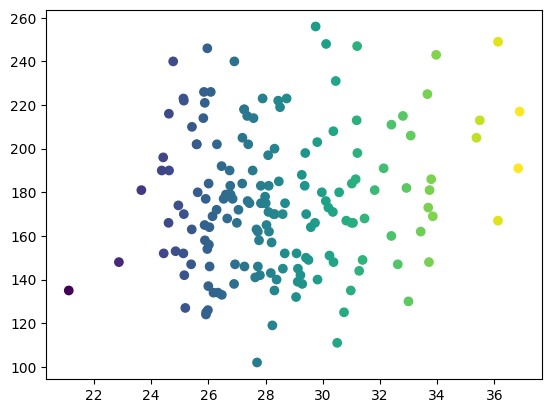

In [14]:
plt.scatter(high['BMI'], high['총콜레스테롤'], c=high['BMI'])

plt.show()

* 인덱스 변경하기
- BMI 결과가 비만, 정상, 과체중일 경우 몸무게와 혈당식전과의 관계 확인 하기 

In [15]:
df_all = high.set_index(keys=['Result'], inplace=False)
df_all.head()

,학교고유번호,광역시도,학교명,학년,성별,키,몸무게,혈당식전,총콜레스테롤,간기능,BMI
Result,,,,,,,,,,,
비만,Ac01,서울,숙명여자고등학교,1,여,162.3,81.7,96.0,184.0,15.0,31.015945
비만,Ac01,서울,숙명여자고등학교,1,여,155.3,61.3,132.0,163.0,17.0,25.416606
비만,Ac01,서울,숙명여자고등학교,1,여,160.4,77.1,95.0,180.0,21.0,29.967164
비만,Ac01,서울,숙명여자고등학교,1,여,157.6,65.9,82.0,177.0,17.0,26.532183
비만,Ac01,서울,숙명여자고등학교,1,여,169.7,72.4,95.0,222.0,84.0,25.140556


In [16]:
df_all.index.unique()

Index(['비만', '정상', '과체중'], dtype='object', name='Result')

In [30]:
def myScatter (label, color) : 
    la_data = df_all.loc[label]
    plt.scatter(la_data['몸무게'],
               la_data['혈당식전'],
               c = color,
               label = label)

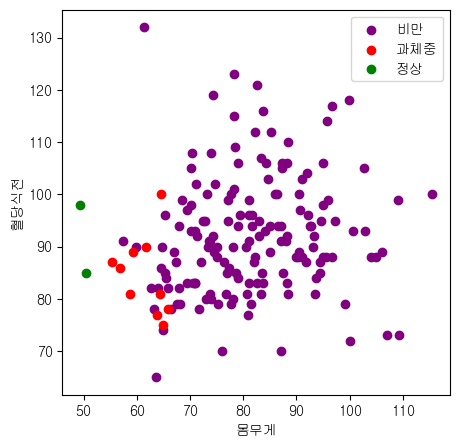

In [32]:
plt.figure(figsize=(5,5))
myScatter('비만','purple')
myScatter('과체중','red')
myScatter('정상','green')
#myScatter('저체중','pink')
plt.xlabel('몸무게')
plt.ylabel('혈당식전')

plt.legend()
plt.show()